In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_utils import *
import cifar10_DNN

Using TensorFlow backend.


cifar10_DNN모듈을 사용한다

원래 이미지 데이터

In [2]:
(X_train_origin, Y_train_origin), (X_test_origin, Y_test_origin) = cifar10_DNN.datasets.cifar10.load_data()

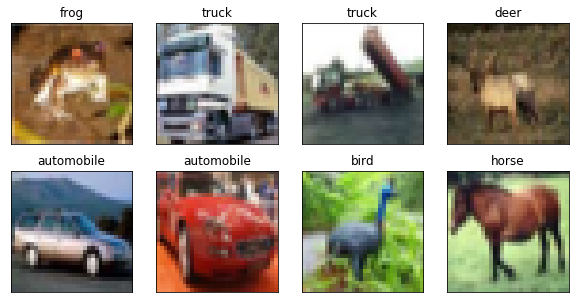

In [3]:
show_images(X_train_origin, Y_train_origin, 8)

pre-processing된 데이터 load

In [4]:
(X_train, Y_train), (X_test, Y_test) = cifar10_data_load(cifar10_DNN.datasets.cifar10)

Data type changed to float32, label type changed to categorical
Normalize Data


In [5]:
cifar_model = cifar10_DNN.CifarDNN(img_shape = X_train.shape[1], class_num = Y_train.shape[1])

모델 펼처보기

In [6]:
cifar_model.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer1 (Dense)         (None, 32)                98336     
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 64)                2112      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
__________

In [7]:
history_train = cifar_model.train(X_train, Y_train, 10, 32, 0.2)

#  model evaluate
result = cifar_model.show_eval(X_test, Y_test, 32)
print('Test Loss : ', result[0])
print('Test Accuracy : ', result[1]*100, '%')

print('predict class : ',cifar_model.model.predict_classes(X_test[:3]))
print('actual class : ', np.where(Y_test[:3])[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 4s 107us/step - loss: 1.9926 - acc: 0.2937 - val_loss: 1.7688 - val_acc: 0.3679
Epoch 2/10
40000/40000 [==============================] - 4s 91us/step - loss: 1.7915 - acc: 0.3560 - val_loss: 1.7000 - val_acc: 0.4003
Epoch 3/10
40000/40000 [==============================] - 4s 97us/step - loss: 1.7298 - acc: 0.3811 - val_loss: 1.6384 - val_acc: 0.4202
Epoch 4/10
40000/40000 [==============================] - 4s 90us/step - loss: 1.6870 - acc: 0.3949 - val_loss: 1.6291 - val_acc: 0.4285
Epoch 5/10
40000/40000 [==============================] - 4s 99us/step - loss: 1.6609 - acc: 0.4087 - val_loss: 1.6046 - val_acc: 0.4357
Epoch 6/10
40000/40000 [==============================] - 4s 98us/step - loss: 1.6458 - acc: 0.4114 - val_loss: 1.6047 - val_acc: 0.4382
Epoch 7/10
40000/40000 [==============================] - 4s 90us/step - loss: 1.6255 - acc: 0.4182 - val_loss: 1.5687 - val_ac

In [8]:
print('predict class : ',cifar_model.model.predict_classes(X_test[:3]))

predict class :  [3 1 8]


In [9]:
print('predict class : ',cifar_model.predict(X_test[:3]))

predict class :  [3 1 8]


In [17]:
prediction = cifar_model.predict(X_test)

In [20]:
print(Y_test_origin[:8])
print(prediction[:8])

[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]]
[3 1 8 8 4 6 3 6]


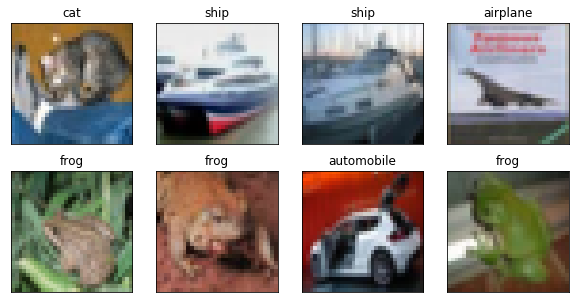

In [16]:
show_images(X_test_origin, Y_test_origin, 8)

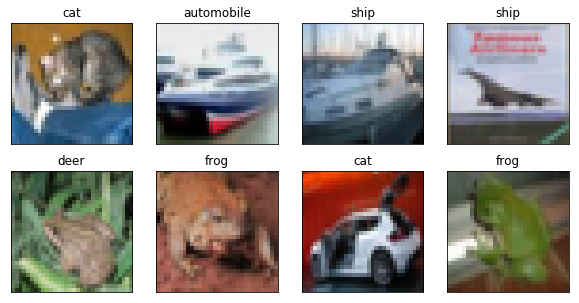

In [18]:
show_images(X_test_origin, prediction, 8)

In [10]:
result = cifar_model.show_eval(X_test, Y_test, 32)

10000/10000 [==============================] - 1s 56us/step
Test Loss :  1.5369360828399659
Test Accuracy :  0.4544


In [11]:
print('predict class : ',cifar_model.model.predict(X_test[:3]))

predict class :  [[1.9716746e-01 4.3525901e-02 1.1570067e-01 2.1846202e-01 5.7324577e-02
  1.3664939e-01 4.7928691e-02 3.3117834e-02 1.2262338e-01 2.7500087e-02]
 [1.8459687e-02 4.2479050e-01 2.6040574e-04 1.9802529e-04 2.6065765e-05
  4.1179876e-05 1.4967204e-04 2.4431682e-04 3.1235880e-01 2.4347137e-01]
 [1.7915088e-01 1.3872007e-01 6.8401503e-03 3.2004884e-03 3.6842634e-03
  1.7233320e-03 3.3390589e-04 2.4330113e-02 4.6344036e-01 1.7857639e-01]]


In [12]:
print('predict class : ',cifar_model.model.predict_classes(X_test[:3]))

predict class :  [3 1 8]


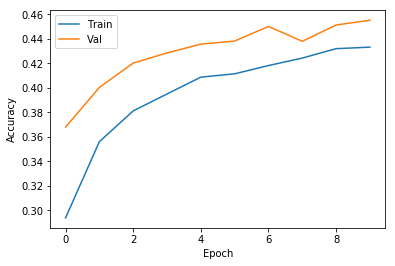

In [13]:
cifar10_DNN.plot_acc(history_train)

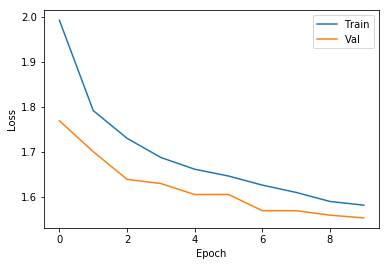

In [14]:
cifar10_DNN.plot_loss(history_train)

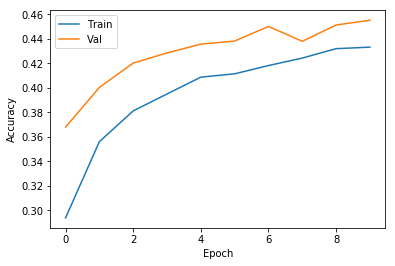

In [15]:
plot_acc(cifar_model.history)